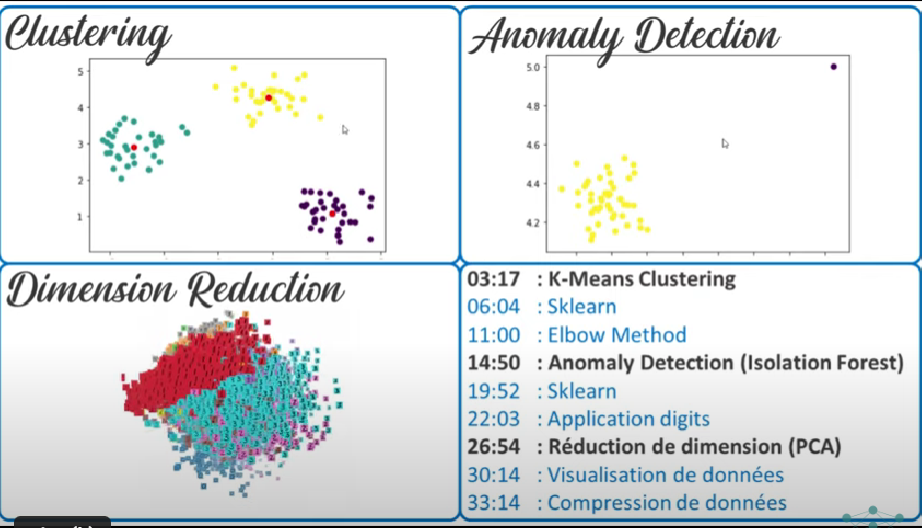

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image('Image/1.png')

####        Introduction
#### Apprentissage Non-Supervise

***Apprentissage Supervise*** On montre à la machine des exemples(X,y) de ce qu'elle doit apprendre.

***Apprentissage non-supervise*** La machine analyse la structure des donnees X pour apprendre elle-meme a realiser certaines taches

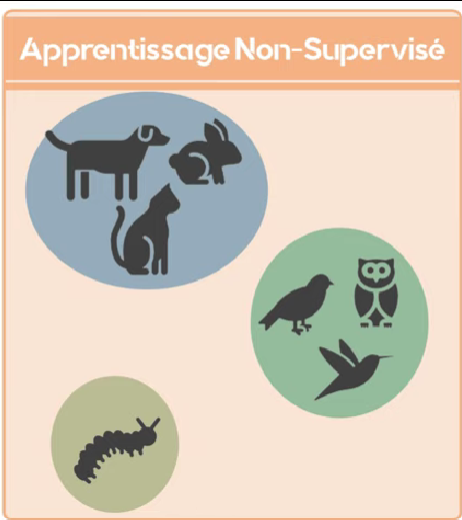

In [3]:
Image("Image/2.png")

**Detection d'anomalies*** Trouver les echantillons dont caracteristiques(X) sont **tres eloignees** de celles des autres echantillons

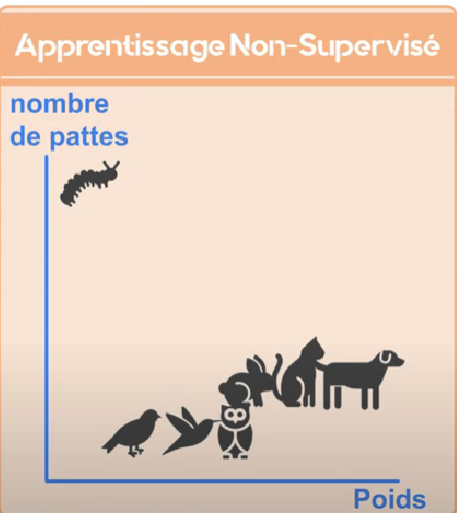

In [4]:
Image("Image/3.png")

**Reduction de dimension**En Etudiant la **structure** de nos donnees,la machine apprend à la **simpliflier** tout en conservant les **principales** informations
Pour realiser cette operation, la machine apprend en fait à **projeter** du miuex possible nos donness dans  des **espaces** de plus **petite dimension**

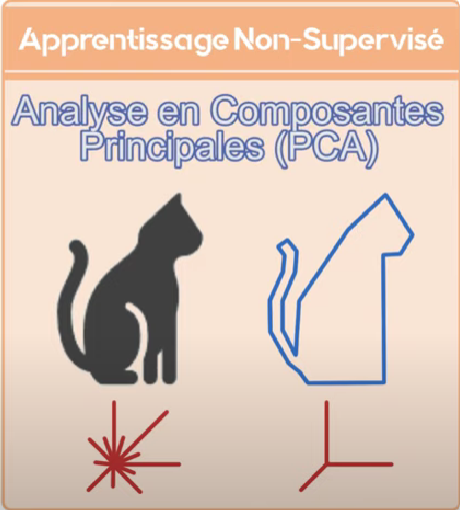

In [5]:
Image("Image/4.png")

## 1. K-Means CLUSTERING

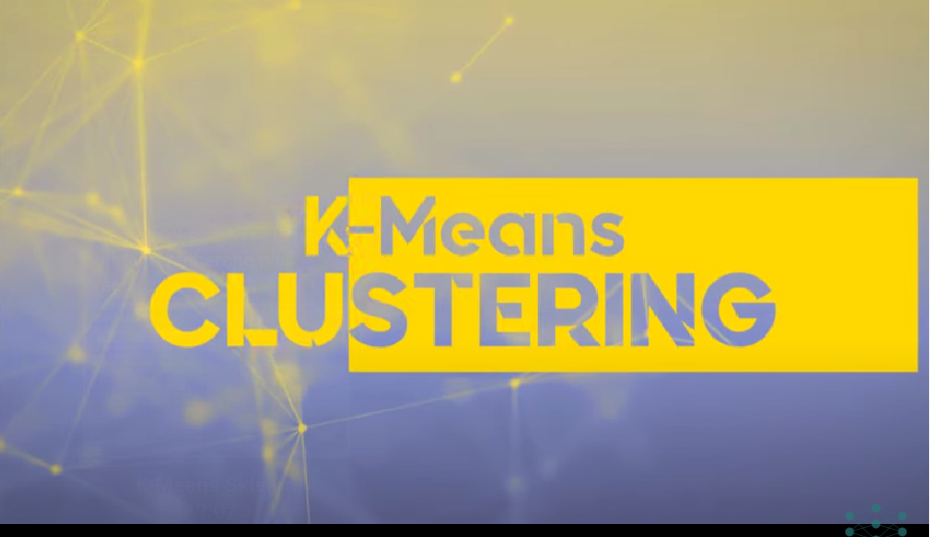

In [6]:
Image("Image/5.png")

On place **k centroids** au hasard dans le dataset ( Ce sont les **barycentres** des futurs clusters )
- Chaque point du dataset est **affecte**  au cluster du centroid le **plus proche**
- Le centroid est **deplace** au milieu du cluster ( la ou se situe la **moyenne** des point)


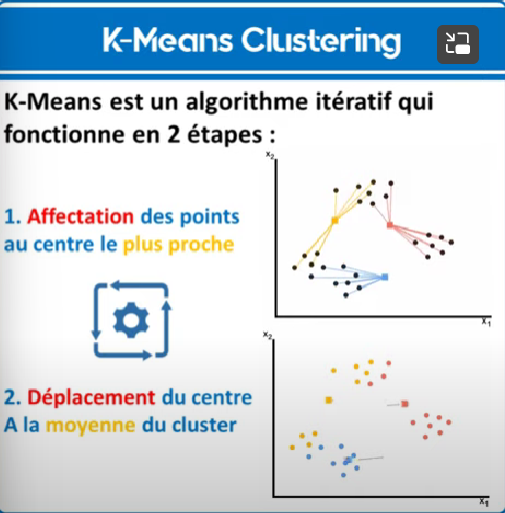

In [7]:
Image("Image/6.png")

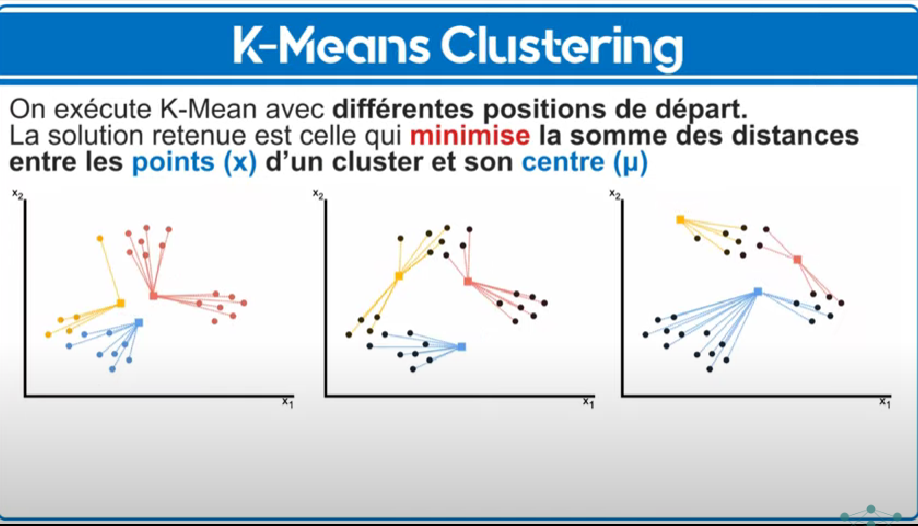

In [8]:
Image("Image/7.png")

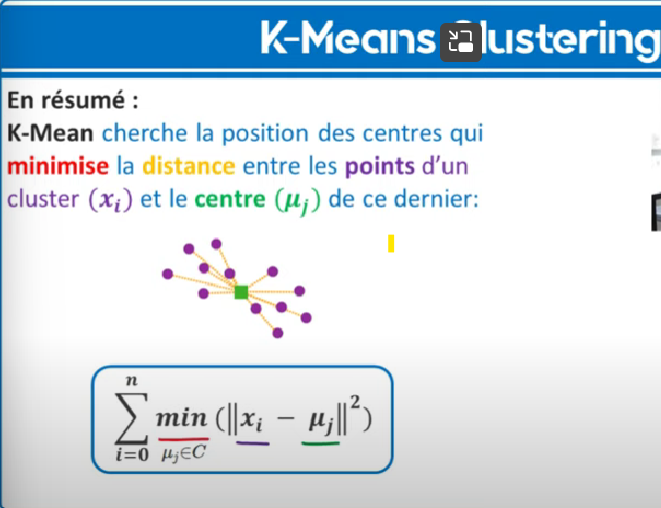

In [9]:
Image("Image/8.png")

###  Clustering

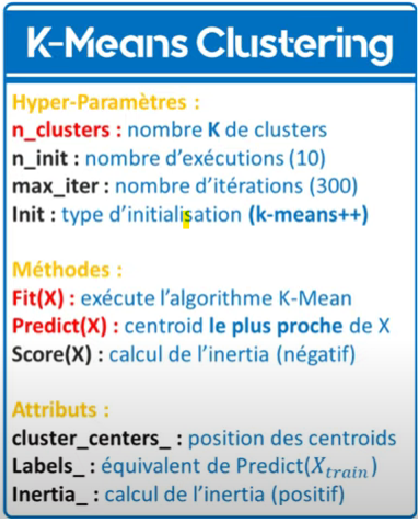

In [10]:
Image("Image/9.png")

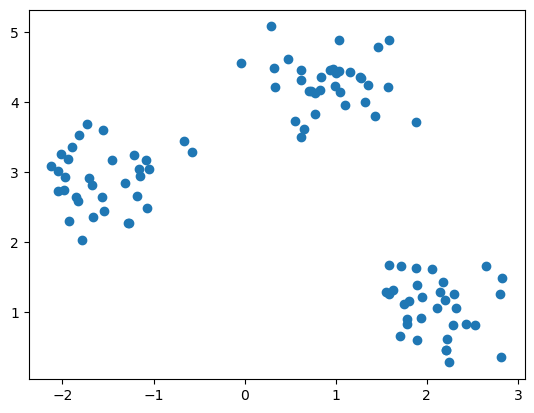

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Generation de donnees
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [22]:
#Importation
from sklearn.cluster import KMeans
X

array([[ 2.28590385,  0.81434416],
       [ 0.61808345,  4.45854833],
       [ 2.43416831,  0.83565962],
       [ 0.33071094,  4.21869122],
       [ 0.55684889,  3.73578015],
       [ 0.83710522,  4.36632692],
       [-1.98589147,  2.74275424],
       [-1.14713569,  2.95290276],
       [ 2.32418542,  1.06064839],
       [ 0.72254124,  4.15869086],
       [ 1.2679063 ,  4.35538049],
       [ 1.46838635,  4.78473927],
       [ 2.2415325 ,  0.28316619],
       [ 1.58938176,  4.89153084],
       [-1.82480594,  2.58730685],
       [ 2.80229111,  1.26008152],
       [-1.56628502,  2.65249095],
       [ 0.65101157,  3.61327429],
       [-1.55420066,  3.60321935],
       [-1.96865735,  2.93874829],
       [-1.78435137,  2.028521  ],
       [-1.54261714,  2.45064486],
       [-1.2708514 ,  2.27109984],
       [ 0.62115578,  3.51146874],
       [ 1.62696647,  1.31944435],
       [ 2.10603236,  1.05845941],
       [ 1.74730109,  1.11336334],
       [ 1.58920759,  1.25799425],
       [-1.67457675,

-30.87053128014067

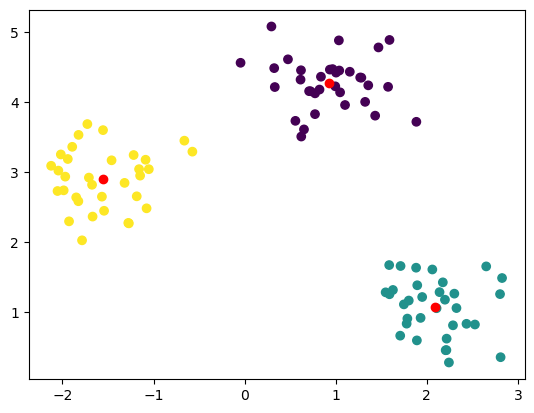

In [25]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1],c=model.predict(X))

#Position final de nos  Centroids
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1] ,c='r')

#Calcul de l'inertia
#model.inertia_
model.score(X)

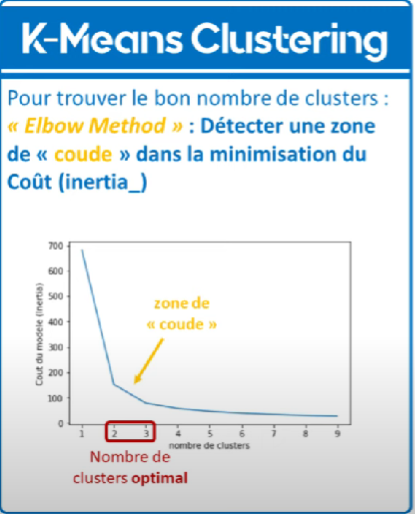

In [26]:
Image("Image/11.png")

### ELBOW METHODE

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du modele (Inertia)')

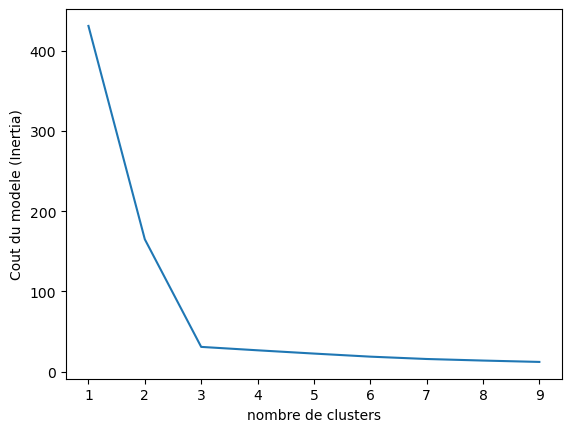

In [28]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. ISOLATION FOREST ANOMALY DETECTION

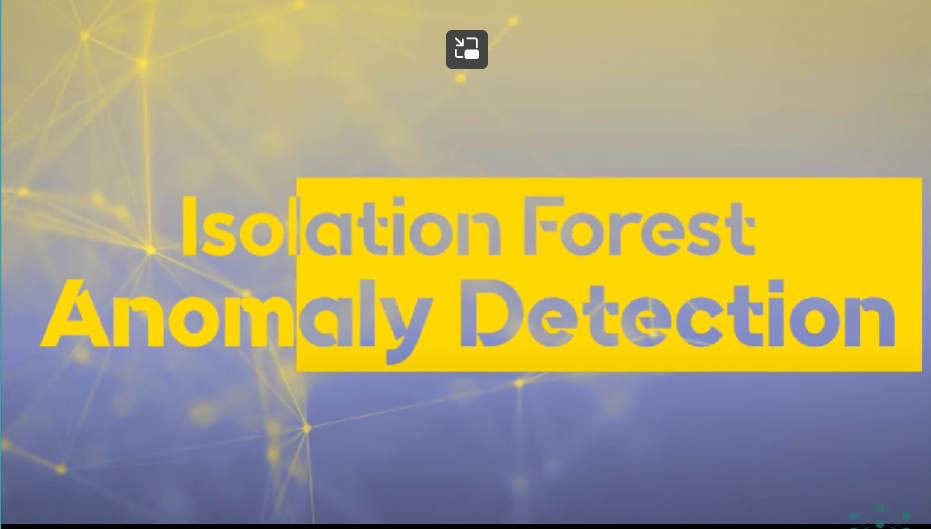

In [30]:
Image("Image/12.png")

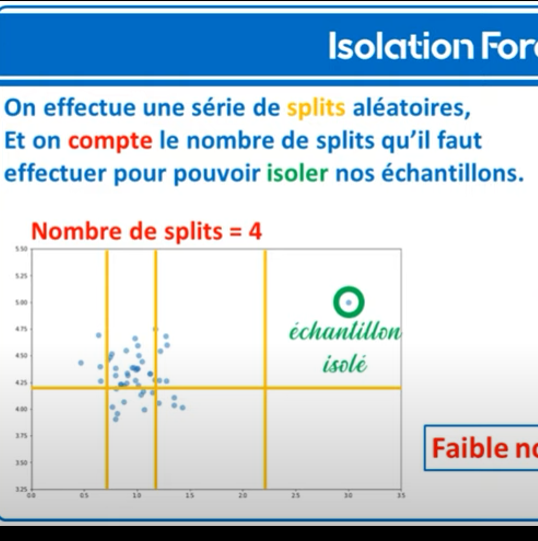

In [31]:
Image("Image/13.png")

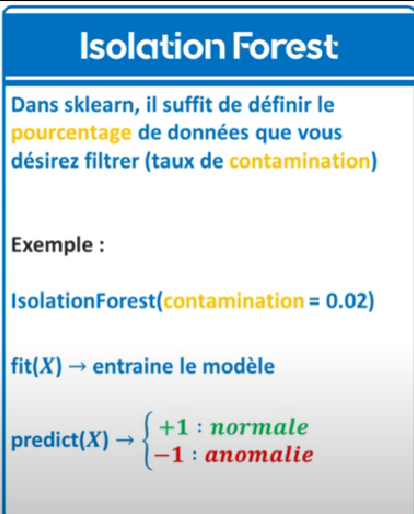

In [32]:
Image("Image/14.png")

In [38]:
from sklearn.ensemble import IsolationForest

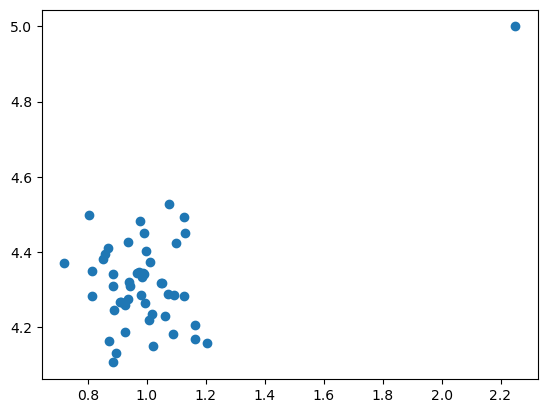

In [36]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [40]:
model =IsolationForest(contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02)

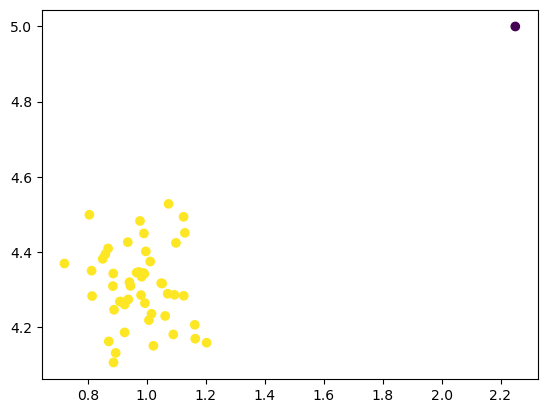

In [41]:
plt.scatter(X[:,0], X[:, 1],c=model.predict(X))

### Application Decontamination Digits

In [42]:
from sklearn.datasets import load_digits

In [43]:
digits = load_digits()
images = digits.images
X=digits.data
y=digits.target
print(X.shape)

(1797, 64)


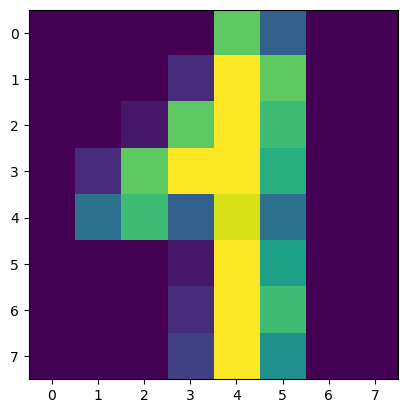

In [45]:
#Visualiser une des images
plt.imshow(images[42])

In [46]:
model = IsolationForest(random_state= 0,contamination=0.02)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [47]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

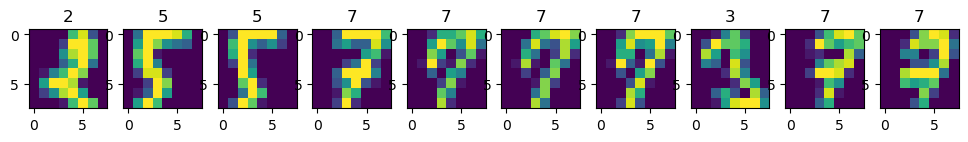

In [48]:
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
#Recupere les anomalies
outliers = model.predict(X) == -1

plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[outliers][i])
    plt.title(y[outliers][i])

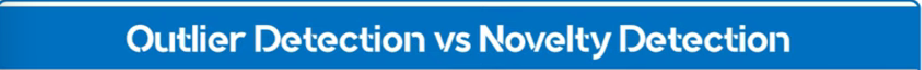

In [50]:
Image("Image/15.png")

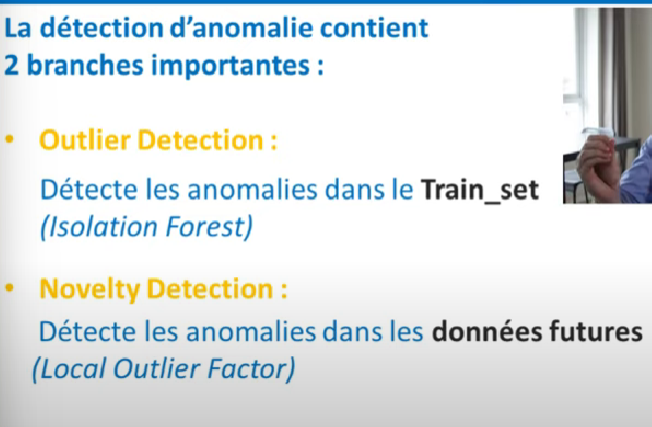

In [51]:
Image("Image/16.png")

## 3. PCA REDUCTION DE DIMENSION

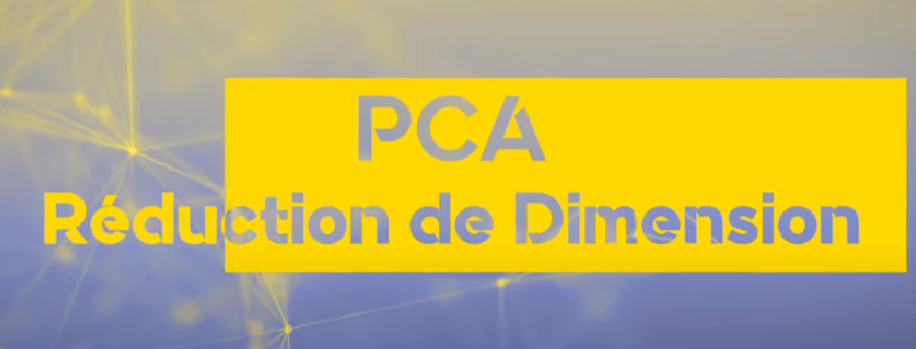

In [52]:
Image("Image/18.png")

Le principe est de reduire **la complexite superflue**  d'un dataset en projetant ses donnees dans un espace de plus petite dimension(un espace avec **moins de variable**)
- **Accelerer l'apprentissage** de la machine
- Lutter contre **le fleau de la dimension**(risque d'overfitting lie au surplus de dimension)

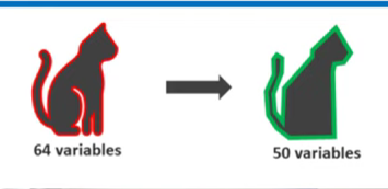

In [53]:
Image("Image/19.png")

##### Analyse en composant Principales

Le principe est de **projeter** nos donnees sur des axes appele **composantes principales** ,en cherchant à **minimiser la distance** entre nos **point** et leur **projections**

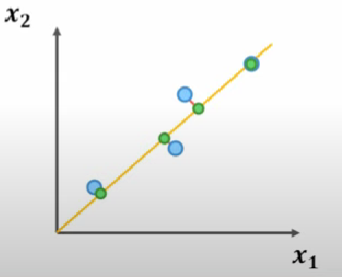

In [54]:
Image("Image/20.png")

De cette maniere ,on reduit la dimension de notre dataset tout en **preservant au maximun la variance** de nos donnees

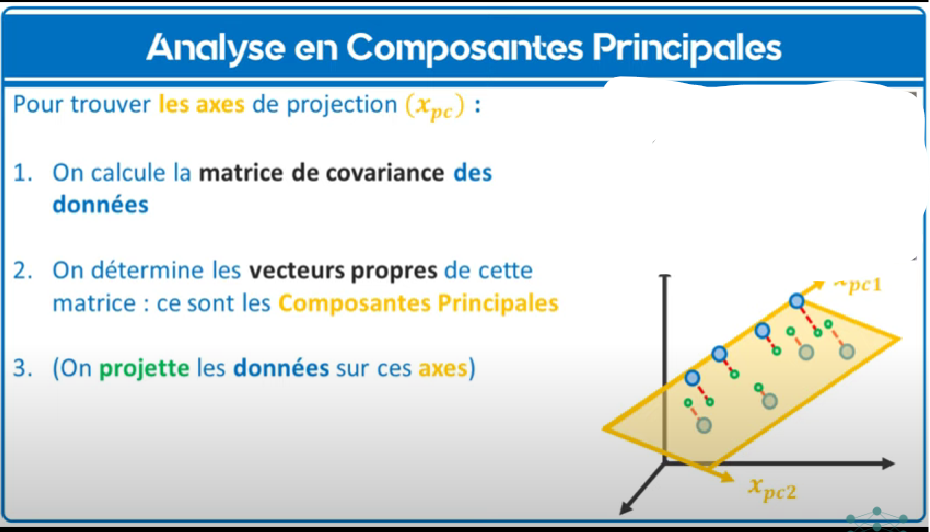

In [55]:
Image("Image/21.png")

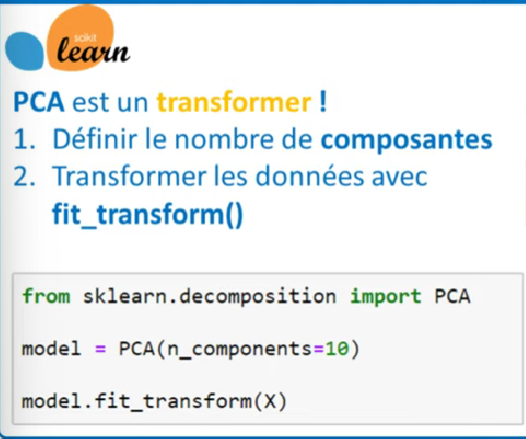

In [56]:
Image("Image/22.png")

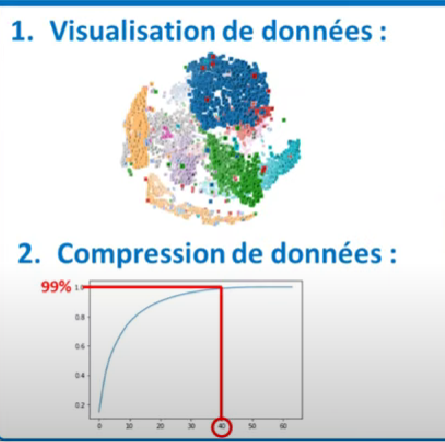

In [57]:
Image("Image/23.png")

#### a.Visualisation de donnee

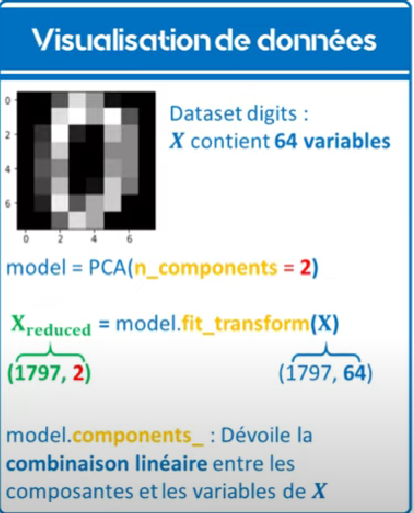

In [58]:
Image("Image/24.png")

In [59]:
from sklearn.decomposition import PCA

In [60]:
X.shape

(1797, 64)

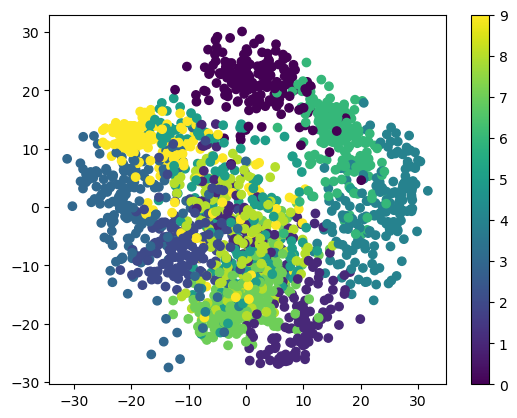

In [64]:
model = PCA(n_components=2)
#model.fit_transform(X).shape
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

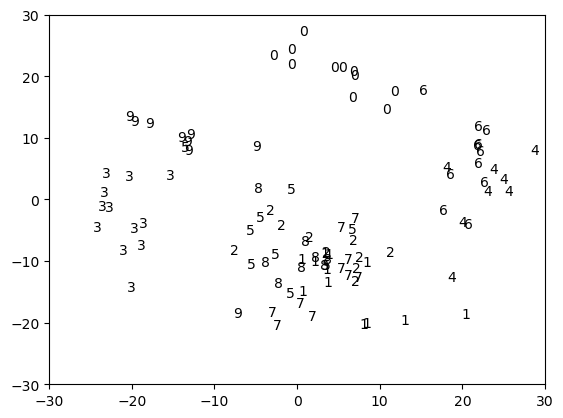

In [73]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(model.transform(X)[i,0],model.transform(X)[i,1], str(y[i]))

#### b.Compression de donnees

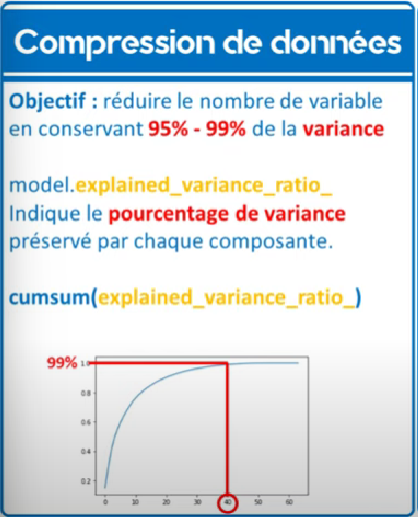

In [65]:
Image("Image/25.png")

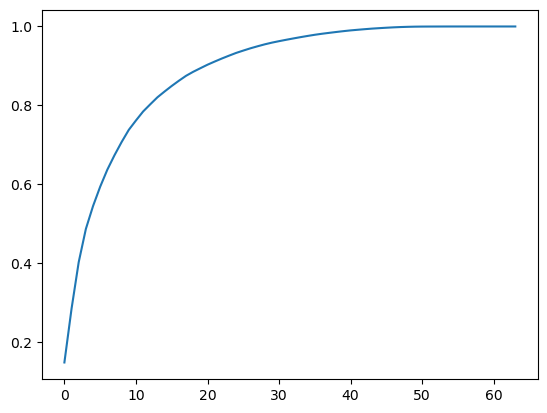

In [68]:
#On va entrainer notre model sur le meme nombre de dimension de X.Shape (64)
model = PCA(n_components=64)
X_reduced =model.fit_transform(X)

#Examiner le pourcentage   de variance preserver par chacune de composante

np.cumsum(model.explained_variance_ratio_)

plt.plot(np.cumsum(model.explained_variance_ratio_))



In [76]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99)

40

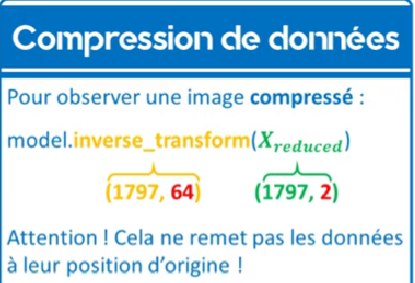

In [77]:
Image("Image/26.png")

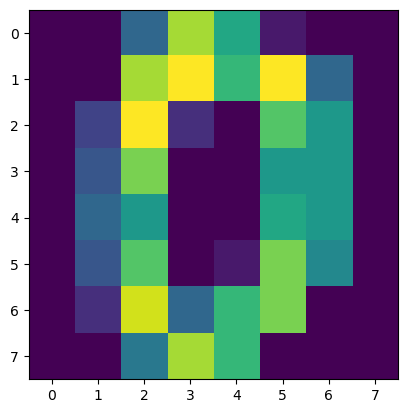

In [79]:
X_recorved = model.inverse_transform(X_reduced)
plt.imshow(X_recorved[0].reshape((8,8)))

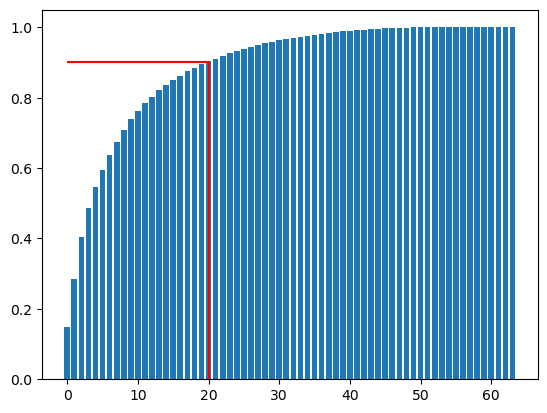

In [80]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

Text(0.5, 1.0, 'Compressé')

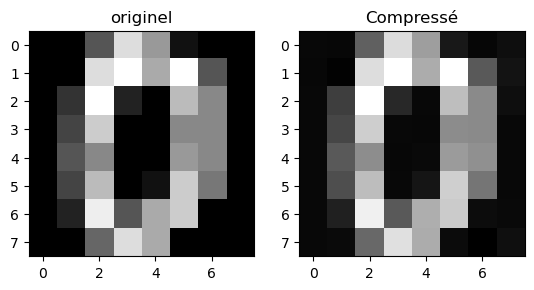

In [84]:
model = PCA(n_components=0.99)
model.fit(X)


X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')